In [125]:
import pandas as pd
import numpy as np
import math

millnames = ['',' Thousand',' Million',' Billion',' Trillion']

def millify(n):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

In [126]:
data = pd.read_csv("D://FertilizersProduct.csv",encoding='ISO-8859-1')
data['Value'] = data['Value'].multiply(1000)
data


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4490.0,R
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2000.0,R
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2070.0,R
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2690.0,R
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1070.0,R
...,...,...,...,...,...,...,...,...,...,...,...
164463,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2004,2004,tonnes,5000.0,Fb
164464,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2008,2008,tonnes,2130.0,Fb
164465,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2009,2009,tonnes,9000.0,Fb
164466,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2010,2010,tonnes,4971000.0,Fb


In [127]:
data["Area"].nunique()

171

In [128]:
India_data = data.loc[data.Area == 'India'].copy()
Except_India=data.loc[data.Area != 'India'].copy()


In [129]:
India_Exports = India_data.loc[data.Element == 'Export Value'].copy()
India_Import = India_data.loc[data.Element == 'Import Value'].copy()




In [131]:
India_Exports
print('India exported US$',millify(India_Exports.Value.sum()),"of total fertilizers")

India exported US$ 975 Million of total fertilizers


In [132]:
World_Agr_usage=Except_India.loc[data.Element == 'Agricultural Use']
World_Agr_usage.sort_values(by=['Value'], ascending=False)
World_Agr_usage

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
110,2,Afghanistan,4021,NPK fertilizers,5157,Agricultural Use,2002,2002,tonnes,17900000.0,Fb
111,2,Afghanistan,4021,NPK fertilizers,5157,Agricultural Use,2003,2003,tonnes,33200000.0,Fb
112,2,Afghanistan,4021,NPK fertilizers,5157,Agricultural Use,2004,2004,tonnes,47700000.0,Fb
310,2,Afghanistan,4001,Urea,5157,Agricultural Use,2004,2004,tonnes,42300000.0,Fb
311,2,Afghanistan,4001,Urea,5157,Agricultural Use,2005,2005,tonnes,20577000.0,Fb
...,...,...,...,...,...,...,...,...,...,...,...
164463,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2004,2004,tonnes,5000.0,Fb
164464,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2008,2008,tonnes,2130.0,Fb
164465,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2009,2009,tonnes,9000.0,Fb
164466,181,Zimbabwe,4006,Urea and ammonium nitrate solutions (UAN),5157,Agricultural Use,2010,2010,tonnes,4971000.0,Fb


In [133]:
Agr_usage=India_data.loc[data.Element == 'Agricultural Use']
Agr_usage.sort_values(by=['Value'], ascending=False)
print("inidan Agriculture usage is",millify(India_data.Value.sum()))
Agr_usage

inidan Agriculture usage is 2 Trillion


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
65578,100,India,4002,Ammonium sulphate,5157,Agricultural Use,2002,2002,tonnes,4.728400e+08,Qm
65579,100,India,4002,Ammonium sulphate,5157,Agricultural Use,2003,2003,tonnes,5.388200e+08,Qm
65580,100,India,4002,Ammonium sulphate,5157,Agricultural Use,2004,2004,tonnes,5.285700e+08,Qm
65581,100,India,4002,Ammonium sulphate,5157,Agricultural Use,2005,2005,tonnes,5.741300e+08,Qm
65582,100,India,4002,Ammonium sulphate,5157,Agricultural Use,2006,2006,tonnes,5.579100e+08,Qm
...,...,...,...,...,...,...,...,...,...,...,...
66855,100,India,4001,Urea,5157,Agricultural Use,2013,2013,tonnes,3.060048e+10,W
66856,100,India,4001,Urea,5157,Agricultural Use,2014,2014,tonnes,3.061000e+10,W
66857,100,India,4001,Urea,5157,Agricultural Use,2015,2015,tonnes,3.063487e+10,W
66858,100,India,4001,Urea,5157,Agricultural Use,2016,2016,tonnes,2.961358e+10,W


In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Year', ylabel='Value'>

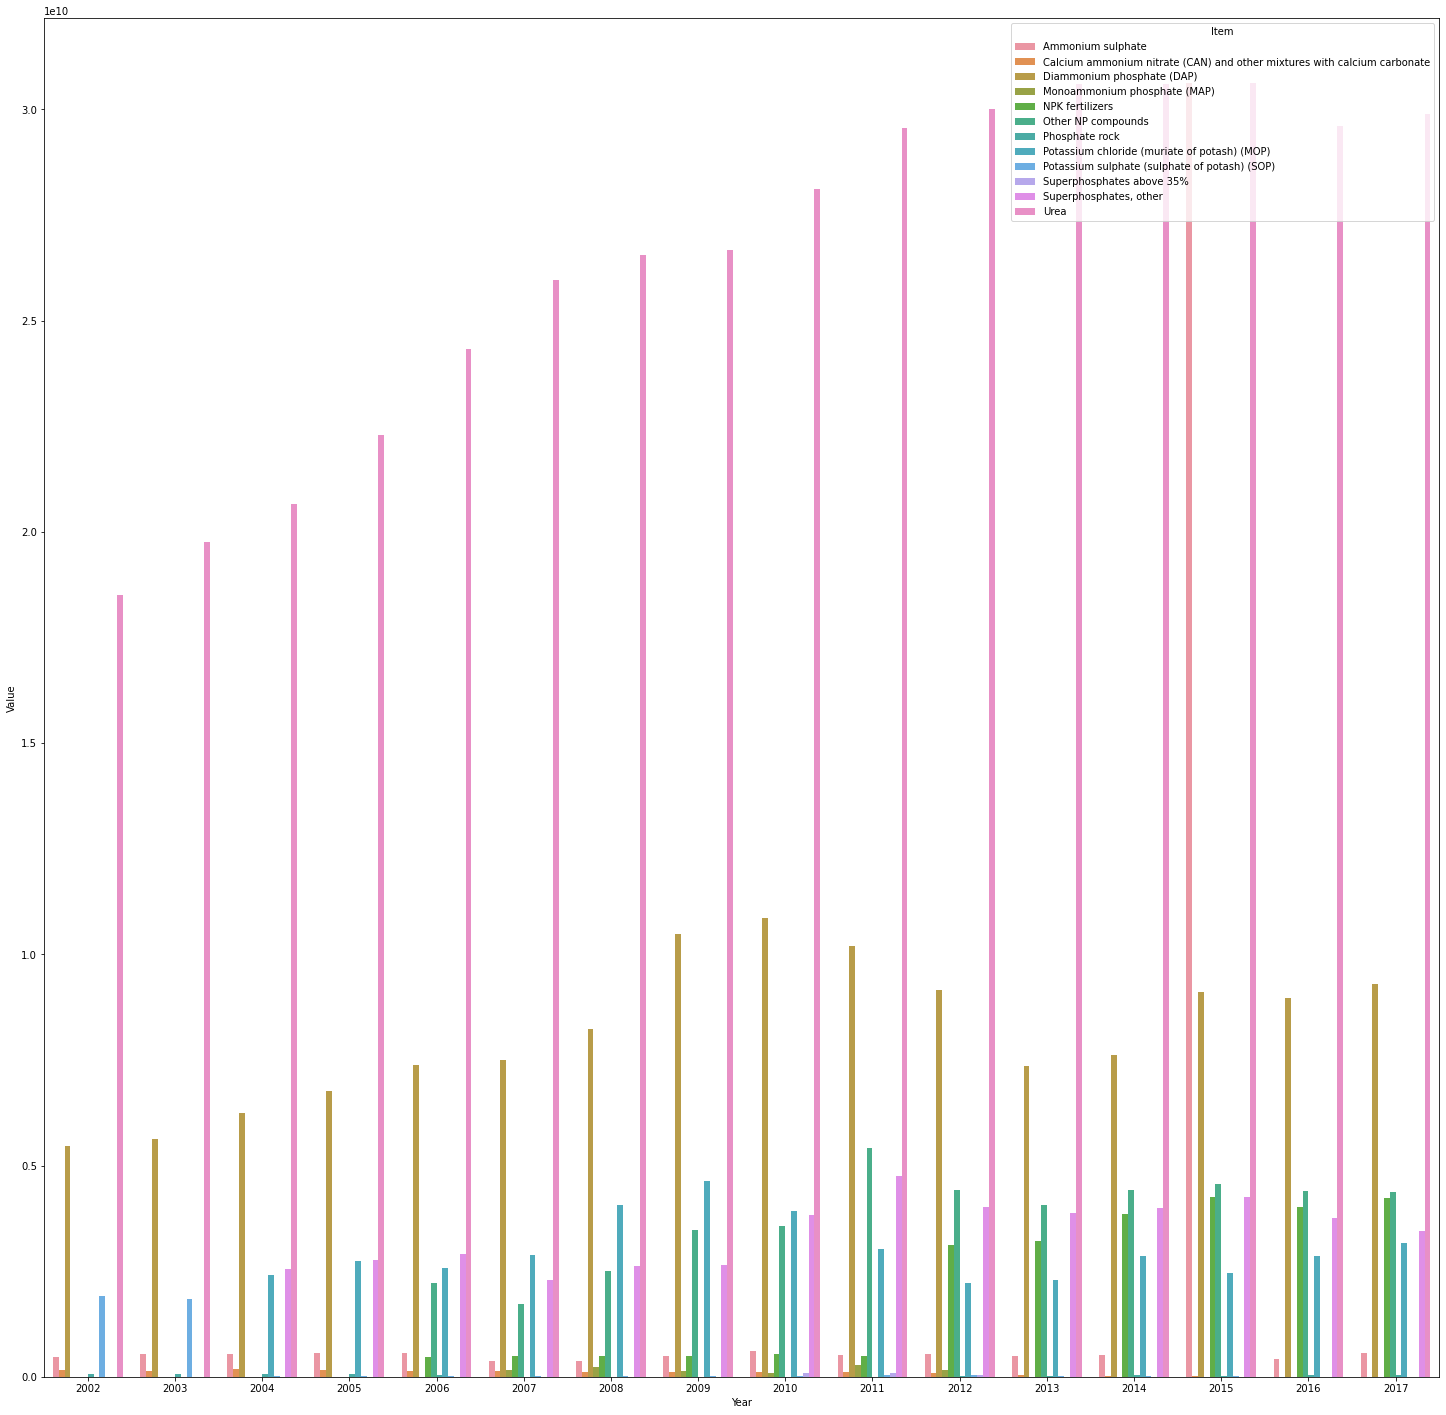

In [135]:
plt.figure(figsize=(25,25))
sns.barplot(x='Year',
    y='Value',
    hue='Item',
    data=Agr_usage
)

<AxesSubplot:xlabel='Year', ylabel='Value'>

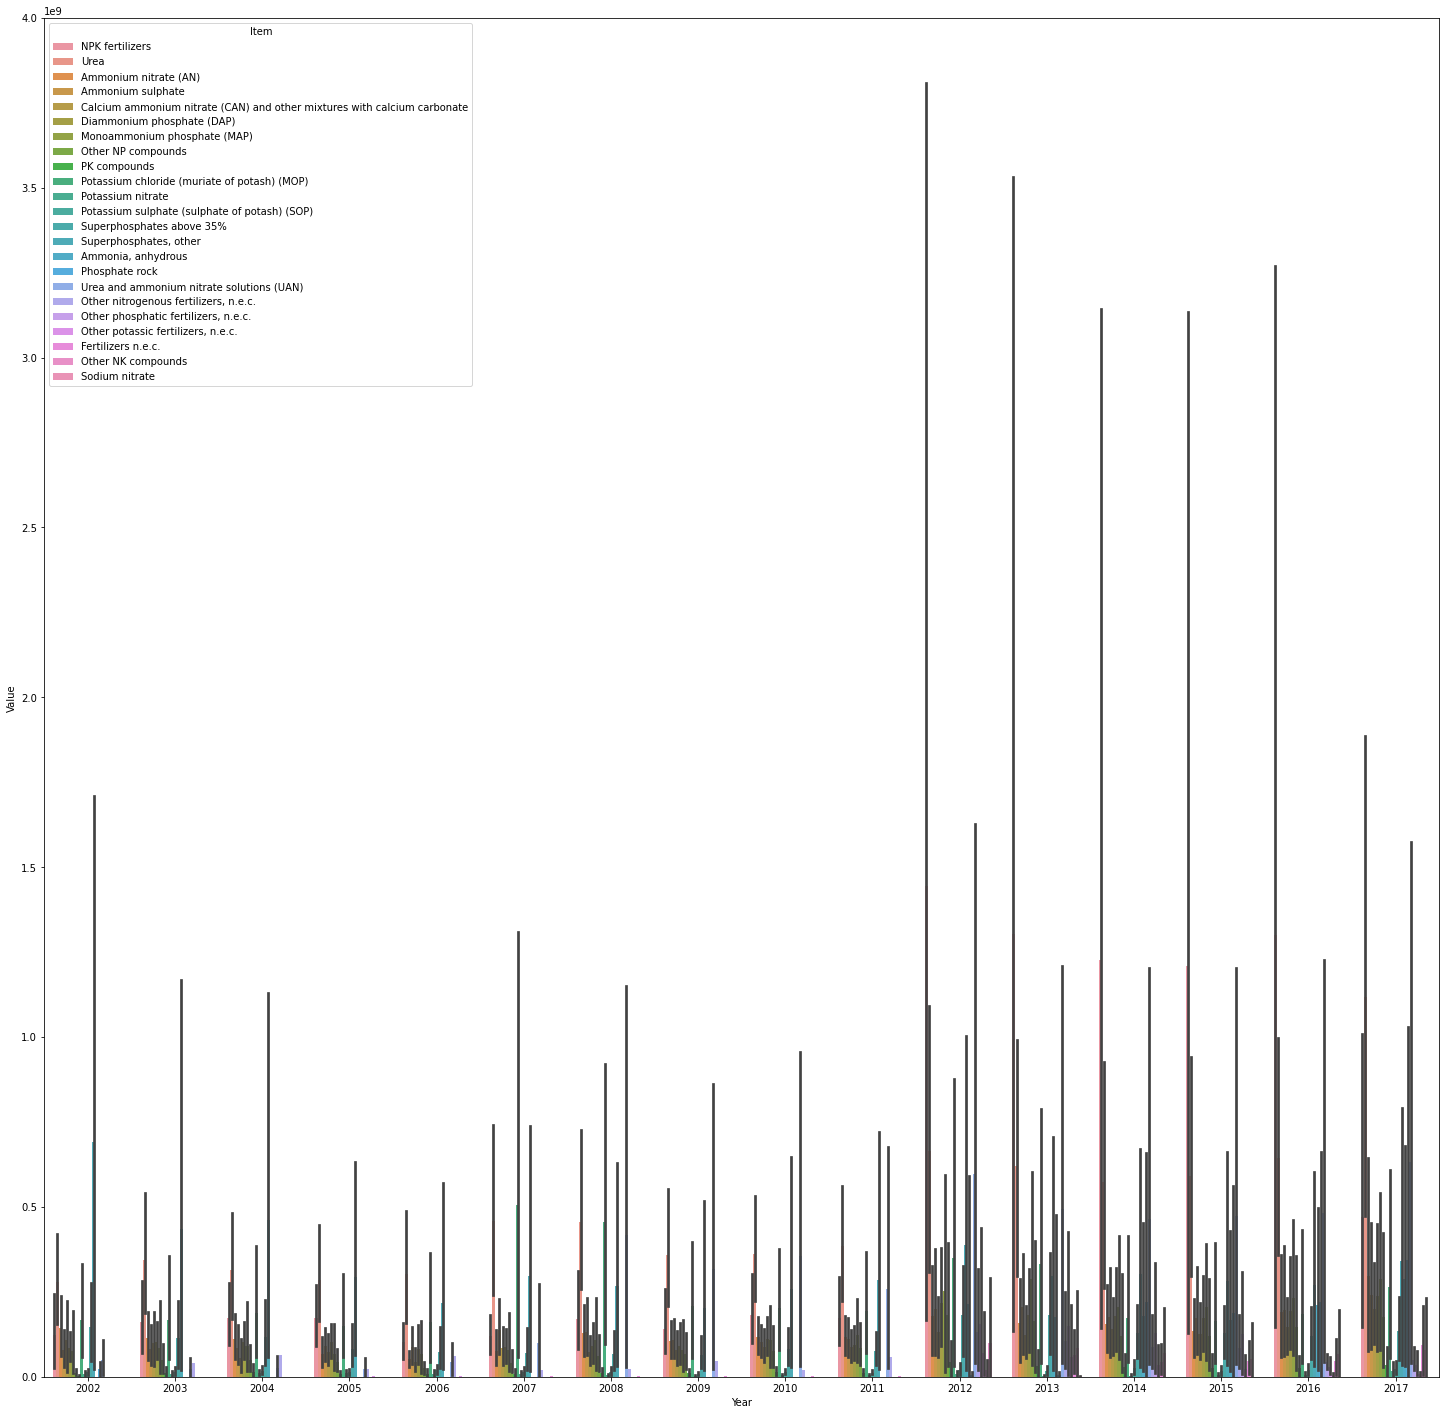

In [136]:
plt.figure(figsize=(25,25))
sns.barplot(x='Year',
    y='Value',
    hue='Item',
    data=World_Agr_usage
)

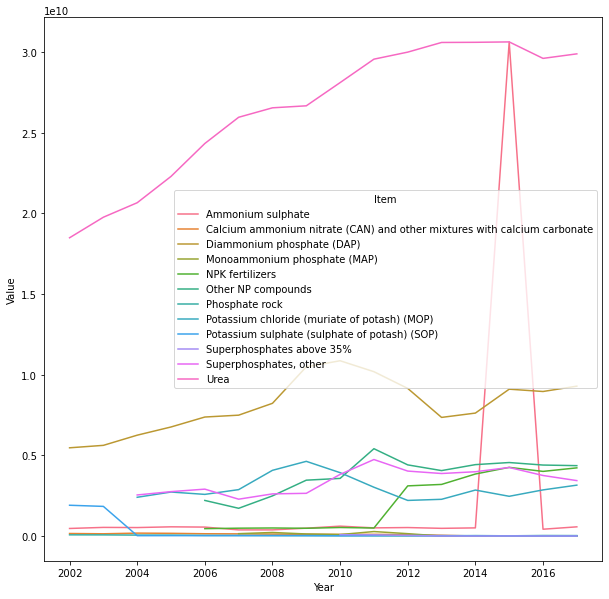

In [137]:
plt.figure(figsize=(10,10))
sns.lineplot(x= 'Year',y = 'Value',hue = 'Item',data=Agr_usage)
plt.show()


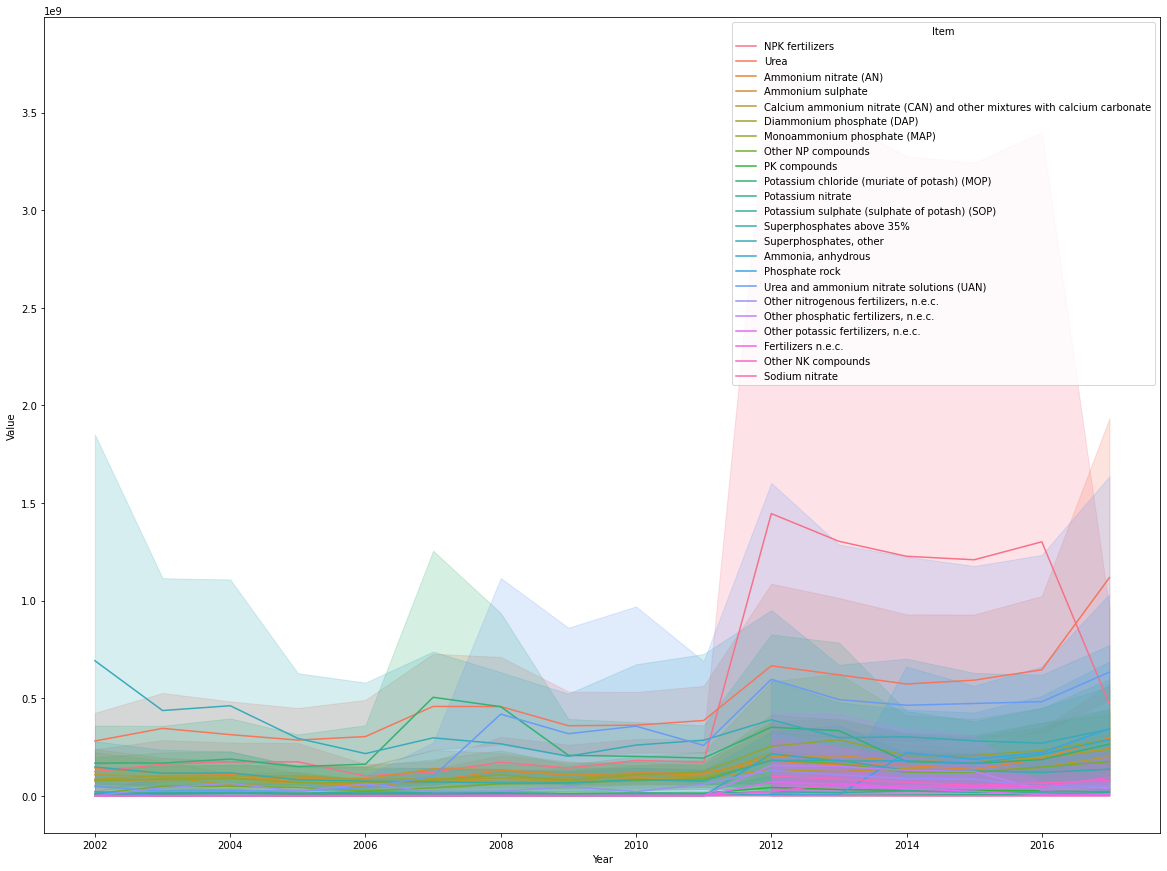

In [138]:
plt.figure(figsize=(20,15))
sns.lineplot(x= 'Year',y = 'Value',hue = 'Item',data=World_Agr_usage)
plt.show()


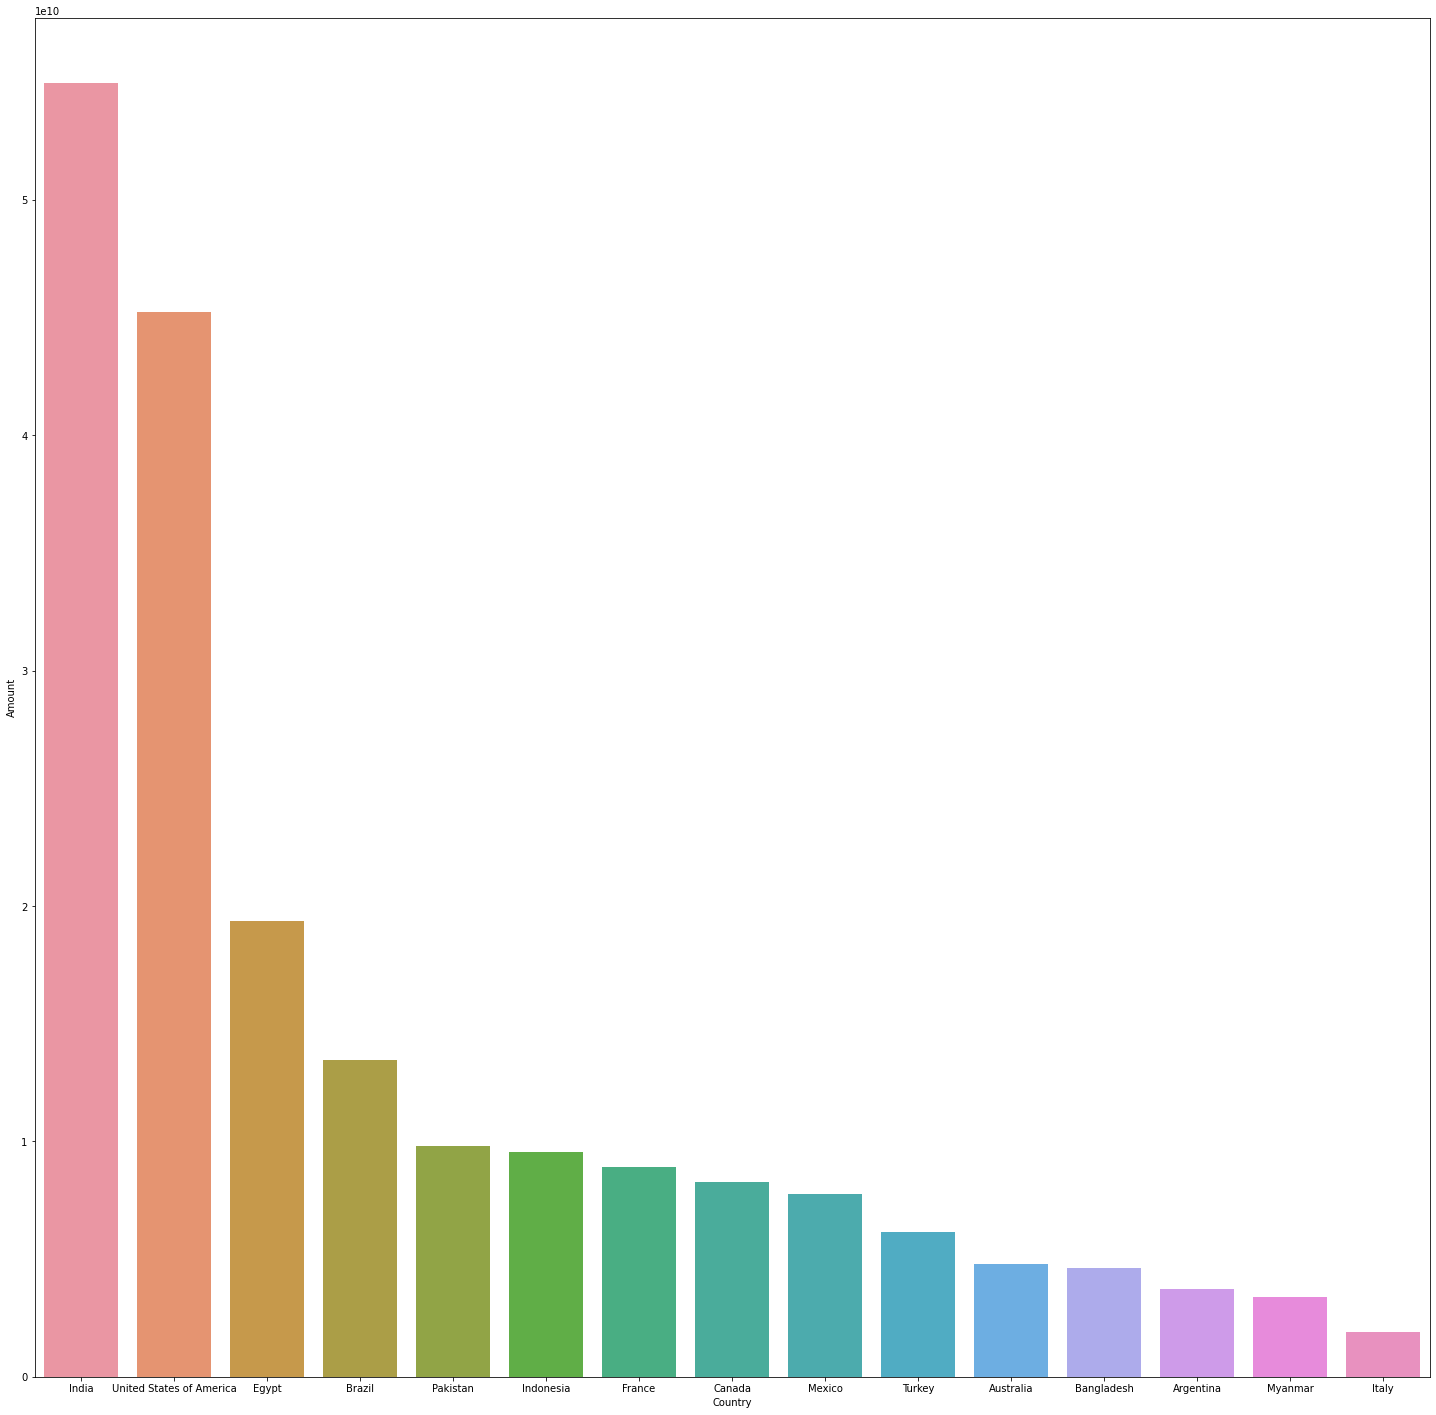

In [139]:
usage_global = data.loc[(data.Element == 'Agricultural Use')  & (data.Year == 2017)]
countries = data.Area.unique()
cdf = []
adf = []
for country in countries:
    df_aux = usage_global.loc[usage_global.Area == country]
    amount = df_aux.Value.sum()
    cdf.append(country)
    adf.append(amount)
df_fert = pd.DataFrame({'Country': cdf, 'Amount': adf})
df_fert = df_fert.sort_values(by=['Amount'], ascending=False)
plt.figure(figsize=(25,25))
sns.barplot(data= df_fert.iloc[:15,:],x = "Country",y = 'Amount')
plt.show()

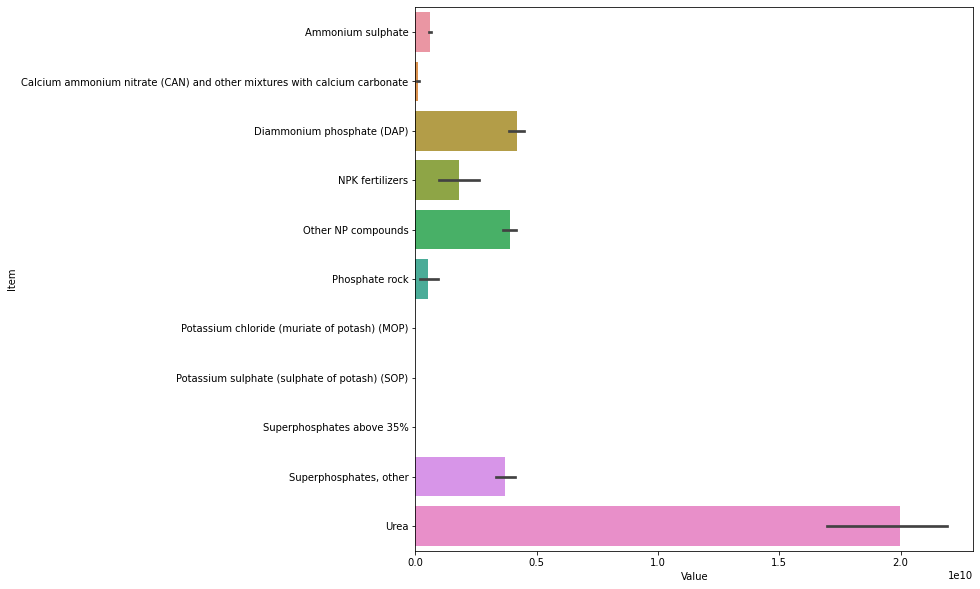

In [140]:
fert_prod = India_data.loc[India_data.Element == 'Production']
fert_prod.sort_values(by=['Value'], ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(data= fert_prod.iloc[:,:10],y = "Item",x = 'Value')
plt.show()

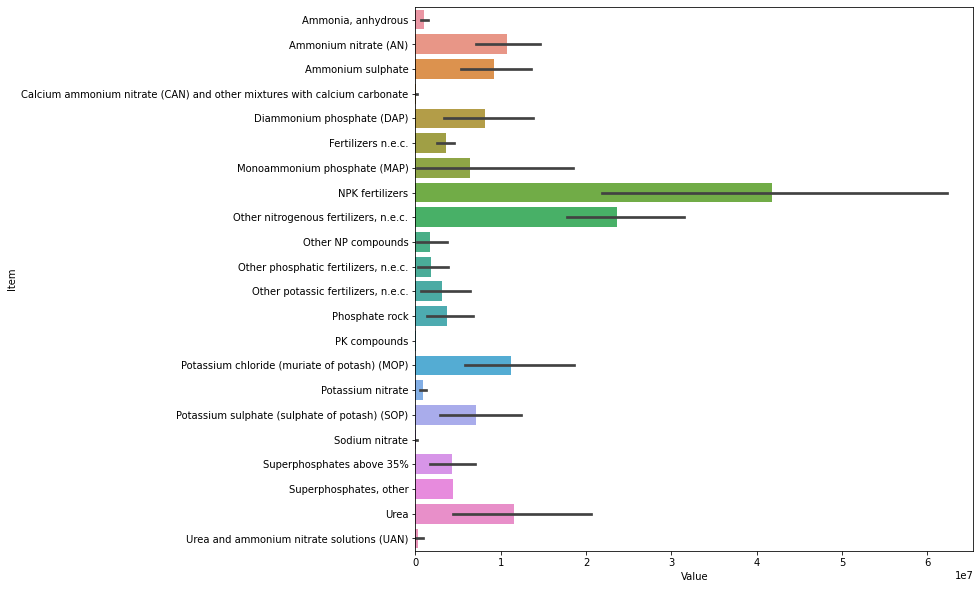

In [141]:
fert_expo = India_data.loc[India_data.Element == 'Export Quantity']
fert_expo.sort_values(by=['Value'], ascending=False)

plt.figure(figsize=(10,10))
sns.barplot(data= fert_expo.iloc[:,:10],y = "Item",x = 'Value')
plt.show()
   


In [143]:
total_export_world = Except_India.loc[(data.Element == 'Export Value')]
total_export_world


,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
23,2,Afghanistan,4004,Calcium ammonium nitrate (CAN) and other mixtu...,5922,Export Value,2003,2003,1000 US$,1510.0,R
75,2,Afghanistan,4030,Fertilizers n.e.c.,5922,Export Value,2011,2011,1000 US$,10000.0,R
76,2,Afghanistan,4030,Fertilizers n.e.c.,5922,Export Value,2015,2015,1000 US$,16000.0,R
77,2,Afghanistan,4030,Fertilizers n.e.c.,5922,Export Value,2017,2017,1000 US$,2020.0,R
91,2,Afghanistan,4023,Monoammonium phosphate (MAP),5922,Export Value,2003,2003,1000 US$,58810.0,R
...,...,...,...,...,...,...,...,...,...,...,...
164431,181,Zimbabwe,4001,Urea,5922,Export Value,2007,2007,1000 US$,356830.0,Qm
164432,181,Zimbabwe,4001,Urea,5922,Export Value,2009,2009,1000 US$,950.0,Qm
164433,181,Zimbabwe,4001,Urea,5922,Export Value,2010,2010,1000 US$,275910.0,Qm
164434,181,Zimbabwe,4001,Urea,5922,Export Value,2011,2011,1000 US$,2602410.0,Qm


In [157]:
prod_value = India_data.loc[(India_data.Element == 'Production')]
prod_value.head()
total = prod_value['Value'].sum()
print("Total Production of the worls is  " ,millify(total))

Total Production of the worls is   488 Billion


In [145]:
india_export = India_Exports['Value'].sum()
total_export_world = data.loc[(data.Element == 'Export Value')]
total_export_world
world_export = total_export_world['Value'].sum()
millify(world_export)


'925 Billion'

In [146]:
shared_export = round((india_export/world_export)*100,2)

print(f'Total shared percentage of india in export on world label: {shared_export}%')

Total shared percentage of india in export on world label: 0.11%


In [153]:
total_import_world = data.loc[(data.Element == 'Import Value')]
total_import_world.head()
world_import = total_import_world['Value'].sum()
print (f'Whole World imported US$ {millify(world_import)} of total fertilizers')

Whole World imported US$ 1 Trillion of total fertilizers


In [155]:
total_import = India_data.loc[(India_data.Element == 'Import Value')]
india_import = total_import['Value'].sum()
print (f'India imported US$ {millify(india_import)} of total fertilizers')


India imported US$ 102 Billion of total fertilizers


Urea                                                                       
Ammonium sulphate                                                          
Diammonium phosphate (DAP)                                                 
NPK fertilizers                                                            
Phosphate rock                                                             
Potassium sulphate (sulphate of potash) (SOP)                              
Potassium chloride (muriate of potash) (MOP)                               
Other NP compounds                                                         
Monoammonium phosphate (MAP)                                               
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate   
Ammonia, anhydrous                                                         
Sodium nitrate                                                             
Potassium nitrate                                                          
Other potass

C:\Users\Harsh\AppData\Local\Temp/ipykernel_6836/2096240529.py:38: MatplotlibDeprecationWarning: Support for passing a startangle of None to mean 0 is deprecated since 3.3 and will be removed two minor releases later.
  plt.pie(x = [y,x],labels = ['Total World Production in Urea',"Total India's Production in Urea "],shadow=True,


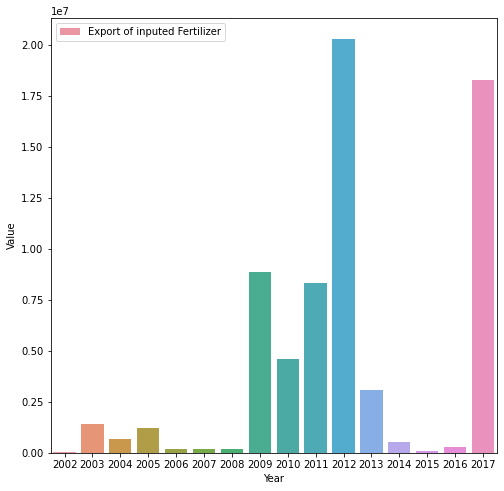

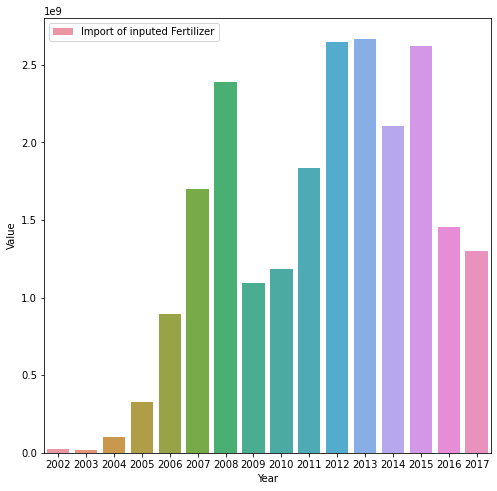

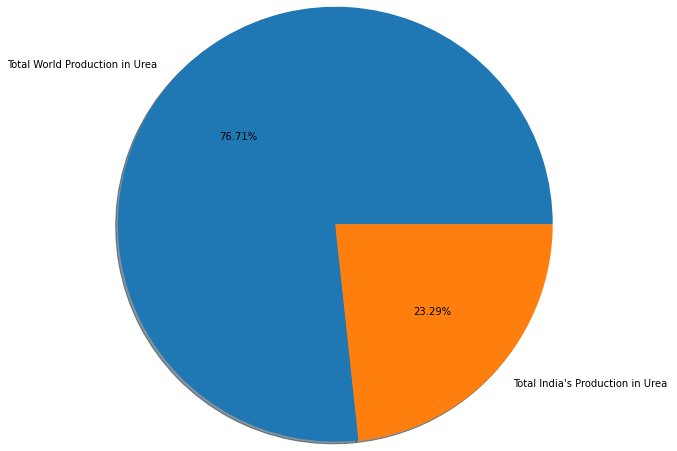

In [162]:
print("""Urea                                                                       
Ammonium sulphate                                                          
Diammonium phosphate (DAP)                                                 
NPK fertilizers                                                            
Phosphate rock                                                             
Potassium sulphate (sulphate of potash) (SOP)                              
Potassium chloride (muriate of potash) (MOP)                               
Other NP compounds                                                         
Monoammonium phosphate (MAP)                                               
Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate   
Ammonia, anhydrous                                                         
Sodium nitrate                                                             
Potassium nitrate                                                          
Other potassic fertilizers, n.e.c.                                         
Ammonium nitrate (AN)                                                      
Other nitrogenous fertilizers, n.e.c.                                       
Fertilizers n.e.c.                                                          
Other phosphatic fertilizers, n.e.c.                                        
Superphosphates above 35%                                                   
PK compounds                                                                
Superphosphates, other                                                      
Urea and ammonium nitrate solutions (UAN)""") 

i=input("Enter Fertilizar name for  Report and Graph")
w = India_Import.loc[India_Import.Item==i]
v = India_Exports.loc[India_Exports.Item == i]
x = India_data.loc[(India_data.Item == i) & (India_data.Element == 'Production') & (India_data.Area == 'India')]
x = x['Value'].sum()
y= data.loc[(data.Item == i) & (data.Element == 'Production')]
y = y['Value'].sum()
plt.figure(figsize=(8,8))
sns.barplot(data = v, x="Year", y="Value",label="Export of inputed Fertilizer")
plt.legend()
plt.figure(figsize=(8,8))
sns.barplot(data = w, x="Year", y="Value",label="Import of inputed Fertilizer")
plt.legend()
plt.figure(figsize=(5,5))
plt.pie(x = [y,x],labels = ['Total World Production in Urea',"Total India's Production in Urea "],shadow=True,
    labeldistance=1.1,
    startangle=None,
    radius=2,autopct= '%.2f%%')
plt.show()
